Blue Bank Loan Analysis by WendelBurlat https://github.com/wburlat

Blue Bank is a bank in USA that has a loan department which is currently understaffed.
They supply loans to individuals and don’t have much reporting on how risky these
borrowers are.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import files
uploades = files.upload()

Saving loan_data_json.json to loan_data_json.json


In [ ]:
import json
with open('loan_data_json.json') as f:
    data = json.load(f)

This code imports necessary libraries such as Pandas and Matplotlib, as well as the math module. It also imports a dataset in JSON format using the Google Colab API. The dataset is loaded into a Pandas DataFrame for analysis.

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
def fico_use_case(score):
    if score < 400:
        return 'Very Poor'
    elif score >= 400 and score < 600:
        return 'Poor'
    elif score >= 601 and score < 660:
        return 'Fair'
    elif score >= 660 and score < 700:
        return 'Good'
    else:
        return 'Excellent'


df['Fico_category'] = df['fico'].apply(fico_use_case)


In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Fico_category
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Excellent
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Excellent
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Excellent
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Good


In [ ]:
def interest(i):
    if i >.12 :
        return 'High'
    else:
        return 'Low'


The code defines two functions: fico_use_case and interest. fico_use_case categorizes FICO scores into different ranges, while interest categorizes interest rates as "High" or "Low" based on a threshold value of 0.12.

In [ ]:
df['int.rate.type'] = df['int.rate'].apply(interest)


In [ ]:
df['int.rate.type']

0        Low
1        Low
2       High
3        Low
4       High
        ... 
9573    High
9574    High
9575     Low
9576    High
9577    High
Name: int.rate.type, Length: 9578, dtype: object

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Fico_category,intlevel,int.rate.type
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Excellent,Low,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Excellent,Low,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good,High,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Excellent,Low,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Good,High,High


In [ ]:
df['annual_income'] = df['log.annual.inc'].apply(lambda x: round(math.e**x, 2))

The DataFrame is modified to include a new column called annual_income, which is derived from the logarithmic transformation of log.annual.inc. Applying the lambda expresion.

In [ ]:
df['annual_income']

0        85000.0
1        65000.0
2        32000.0
3        85000.0
4        80800.0
          ...   
9573    195000.0
9574     69000.0
9575     40000.0
9576     50000.0
9577     78000.0
Name: annual_income, Length: 9578, dtype: float64

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Fico_category,intlevel,int.rate.type,annual_income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Excellent,Low,Low,85000.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Excellent,Low,Low,65000.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good,High,High,32000.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Excellent,Low,Low,85000.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Good,High,High,80800.0


In [ ]:
catplot =df.groupby(['Fico_category']).size()

<AxesSubplot:xlabel='Fico_category'>

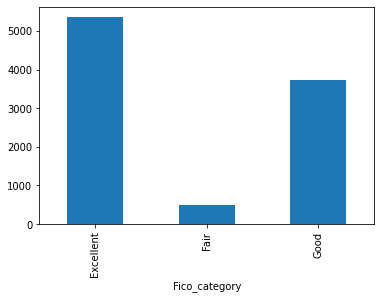

In [ ]:
catplot.plot.bar()






<AxesSubplot:xlabel='purpose'>

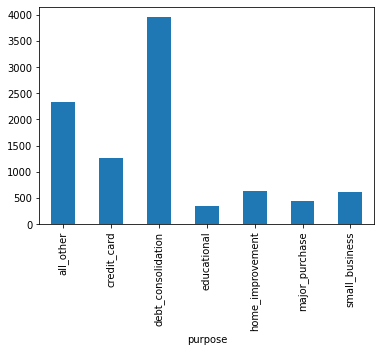

In [ ]:
purpose_plot = df.groupby(['purpose']).size()
purpose_plot.plot.bar()


In [ ]:
df.to_csv('loandata_cleaned', index=False)

In [ ]:
df['id'] = range(1, len(df) + 1)

The code also creates a new column id with values ranging from 1 to the length of the DataFrame, and then removes the count column from the DataFrame before exporting it again to the same CSV file. Use to get a unique index per row and will be used in tableau.

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Fico_category,intlevel,int.rate.type,annual_income,count,id
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Excellent,Low,Low,85000.0,1,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Excellent,Low,Low,65000.0,2,2
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good,High,High,32000.0,3,3
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Excellent,Low,Low,85000.0,4,4
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Good,High,High,80800.0,5,5


In [ ]:
df = df.drop('count', axis=1)

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Fico_category,intlevel,int.rate.type,annual_income,id
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,Excellent,Low,Low,85000.0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,Excellent,Low,Low,65000.0,2
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,Good,High,High,32000.0,3
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,Excellent,Low,Low,85000.0,4
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,Good,High,High,80800.0,5


In [ ]:
df.to_csv('loandata_cleaned', index=False)

# New Section